# Divvy - A Case Study
#### Author: Mark Richards
#### Date: 2022-12-01

## Introduction
This is a case study based open source data provided by Lyft Bikes and Scooters LLC who operate the city of Chicago's Divvy bike sharing service, which allows people to hire bicycles from any of 600+ bike stations across Chicago for short-duration trips. 

Further information on the Divvy bike service data can be found at https://ride.divvybikes.com/system-data.
The data itself is available at https://divvy-tripdata.s3.amazonaws.com/index.html and has been provided for use under the following agreement https://ride.divvybikes.com/data-license-agreement. 

This will be an informal study as I want to make the focus my thought processes, decisions and how I arrived at the conclusions, rather than just produce a finished result.

## Defining the Business Task
The task of this case study will be to examine the differences in usage and user behavior between casual users of the bike-share service (people who pay per trip) and annual members (people pay an annual fee and can use the service at will), to identify the key reasons why people become annual members. Annual membership subscriptions are more profitable than casual users and the conclusions we come to will drive a marketing campaign aiming to increase annual memberships.

## Hypothesis
The hypothesis is that casual users are more leisure-oriented (focusing on cycling for enjoyment), while members are more utility-oriented (focusing on cycling as a practical means of transport from point A to point B).

## The Data
The data we have available consists of historical trip data. Each trip has a unique __trip id__, a __start datetime__ and __end datetime__, a __start station id__ and __end station id__, __start coordinates__ and __end coordinates__ (as separate latitude and longitude), and whether the trip was made by a __casual user__ or an __annual member__.

We will look at data for the 12 month period April 2020 to March 2021. This is stored in CSV format in monthly segments, so 12 separate files.

Lets load the data and combine it into a single tibble.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
setwd("./CSV")

col_spec <- list(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_character(),
  end_station_name = col_character(),
  end_station_id = col_character(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)

tbl_202004_divvy_tripdata <- read_csv("202004-divvy-tripdata.csv",
  col_types = col_spec
)
tbl_202006_divvy_tripdata <- read_csv("202006-divvy-tripdata.csv",
  col_types = col_spec
)
tbl_202008_divvy_tripdata <- read_csv("202008-divvy-tripdata.csv",
  col_types = col_spec
)
tbl_202010_divvy_tripdata <- read_csv("202010-divvy-tripdata.csv",
  col_types = col_spec
)
tbl_202012_divvy_tripdata <- read_csv("202012-divvy-tripdata.csv",
  col_types = col_spec
)
tbl_202102_divvy_tripdata <- read_csv("202102-divvy-tripdata.csv",
  col_types = col_spec
)
tbl_202005_divvy_tripdata <- read_csv("202005-divvy-tripdata.csv",
  col_types = col_spec
)
tbl_202007_divvy_tripdata <- read_csv("202007-divvy-tripdata.csv",
  col_types = col_spec
)
tbl_202009_divvy_tripdata <- read_csv("202009-divvy-tripdata.csv",
  col_types = col_spec
)
tbl_202011_divvy_tripdata <- read_csv("202011-divvy-tripdata.csv",
  col_types = col_spec
)
tbl_202101_divvy_tripdata <- read_csv("202101-divvy-tripdata.csv",
  col_types = col_spec
)
tbl_202103_divvy_tripdata <- read_csv("202103-divvy-tripdata.csv",
  col_types = col_spec
)

ride_data <- bind_rows(
  tbl_202004_divvy_tripdata,
  tbl_202006_divvy_tripdata,
  tbl_202008_divvy_tripdata,
  tbl_202010_divvy_tripdata,
  tbl_202012_divvy_tripdata,
  tbl_202102_divvy_tripdata,
  tbl_202005_divvy_tripdata,
  tbl_202007_divvy_tripdata,
  tbl_202009_divvy_tripdata,
  tbl_202011_divvy_tripdata,
  tbl_202101_divvy_tripdata,
  tbl_202103_divvy_tripdata
)

rm(
  tbl_202004_divvy_tripdata,
  tbl_202006_divvy_tripdata,
  tbl_202008_divvy_tripdata,
  tbl_202010_divvy_tripdata,
  tbl_202012_divvy_tripdata,
  tbl_202102_divvy_tripdata,
  tbl_202005_divvy_tripdata,
  tbl_202007_divvy_tripdata,
  tbl_202009_divvy_tripdata,
  tbl_202011_divvy_tripdata,
  tbl_202101_divvy_tripdata,
  tbl_202103_divvy_tripdata
)

Lets have a look at the data.

In [3]:
glimpse(ride_data)

Rows: 3,489,748
Columns: 13
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <dttm> 2020-04-26 17:45:14, 2020-04-17 17:08:54, 2020-04-…
$ ended_at           <dttm> 2020-04-26 18:12:03, 2020-04-17 17:17:03, 2020-04-…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <chr> "86", "503", "142", "216", "125", "173", "35", "434…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <chr> "152", "499", "255", "657", "323", "35", "635", "38…
$ start_lat          <dbl> 41.8964, 41.9244, 41.8945, 41.9030, 41.8902, 41.896…
$ start_lng          <dbl> -87.6610, -87.7154, -87.6179, -87.6975, -87.6262, -…
$ end_lat            <dbl> 41.9322, 41.9306, 41.8679, 41.8992, 41.9695, 41.892…
$ end_lng            <dbl> -87.6586, -87.7238, -87.6230, -87.6722, -87.6547, -…
$ member_cas

## Cleaning The Data

Lets examine each variable in turn for problems.

* __ride_id__: Each ride_id should be unique as each represents a unique trip but when we check there are 209 duplications. There is no missing data. The number of duplications is tiny in comparison with the total number of rows, so lets remove the duplicate rows.

In [4]:
sum(duplicated(ride_data$ride_id))

sum(is.na(ride_data$ride_id))

ride_data_clean <- filter(ride_data, !duplicated(ride_data$ride_id))

[1] 209

[1] 0

* __rideable_type__: This column only contains three values with no missing data.

In [5]:
unique(ride_data_clean$rideable_type)

sum(is.na(ride_data_clean$rideable_type))

[1] "docked_bike"   "electric_bike" "classic_bike"

[1] 0

* __started_at__: This is a datetime. There are no missing values.

In [6]:
sum(is.na(ride_data_clean$started_at))

[1] 0

* __ended_at__: Another datetime, without missing values. But we also need to check the consistency of the data: the ride end time should be after the start time. In fact though there are 386 trips with zero duration and 10550 with negative duration. These again are only a relatively small proportion of the total number of observations, so lets remove them.

In [7]:
sum(is.na(ride_data_clean$ended_at))

sum((ride_data_clean$ended_at - ride_data_clean$started_at) == 0)

sum((ride_data_clean$ended_at - ride_data_clean$started_at) < 0)

ride_data_clean <- filter(
  ride_data_clean,
  (ride_data_clean$ended_at - ride_data_clean$started_at) > 0
)

[1] 0

[1] 386

[1] 10550

  As we have a start datetime and an end datetime, we can also look at consistency in terms of trip duration. Lets add trip duration as a column.

In [8]:
ride_data_clean <- mutate(ride_data_clean,
  trip_duration_min = as.numeric((ended_at - started_at) / 60)
)

  There are some outlier trip durations which are greater than 12 hours, which we will consider anomalies, so lets remove them.

In [9]:
nrow(filter(ride_data_clean, trip_duration_min > 720))

ride_data_clean <- filter(
  ride_data_clean,
  !(trip_duration_min > 720)
)

[1] 6343

* __start_station_name__: There are 122126 observations without values. Lets pin this point for the moment and come back to it.

In [10]:
sum(is.na(ride_data_clean$start_station_name))

[1] 122126

* __start_station_id__:  There are 122752 missing values. Lets pin this point as well.

In [11]:
sum(is.na(ride_data_clean$start_station_id))

[1] 122752

* __end_station_name__: There are 142033 missing values. 

In [12]:
sum(is.na(ride_data_clean$end_station_name))

[1] 142033

* __end_station_id__: There are 142494 missing values.

In [13]:
sum(is.na(ride_data_clean$end_station_id))

[1] 142494

* __start_lat__: There are no missing values.

In [14]:
sum(is.na(ride_data_clean$start_lat))

[1] 0

* __start_lng__: There are no missing values.

In [15]:
sum(is.na(ride_data_clean$start_lng))

[1] 0

* __end_lat__: There are 3715 missing values.

In [16]:
sum(is.na(ride_data_clean$end_lat))

[1] 3715

* __end_lng__: There are 3715 missing values.

In [17]:
sum(is.na(ride_data_clean$end_lng))

[1] 3715

* __member_casual__: There are no missing values and only two values.

In [18]:
sum(is.na(ride_data_clean$member_casual))
unique(ride_data_clean$member_casual)

[1] 0

[1] "member" "casual"

So the two outstanding issues are:

* __Station Names__: we have data with missing station names and station ids.
* __Trip End Coordinates__: we have data missing the trip end latitude and longitude.

We could try to create a look-up table for the stations using the observations with complete data and then insert missing values using that; and we could try to do something similar for the missing coordinates. But this would be quite complicated.

Or we could just exclude all the observations with missing data. If we do this we would still be keeping most of the data and we will still have a huge number of observations. So lets proceed that way.

In [19]:
ride_data_clean <- filter(
  ride_data_clean,
  !(is.na(ride_data_clean$start_station_name) |
    is.na(ride_data_clean$end_station_name) |
    is.na(ride_data_clean$start_station_id) |
    is.na(ride_data_clean$end_station_id) |
    is.na(ride_data_clean$end_lat) |
    is.na(ride_data_clean$end_lng))
)

## Analysis

We can look at the differences in usage between members and casual users in the following ways:

* Number of trips.
* Trip duration.
* Trip start times.
* Distribution of trips across the data period.
* Distance travelled between start and end station.
* Riding speed.
* Geographical clustering of start/end stations.
* The type of bike used.

### Number of Trips
The number of trips for each user type indicates that members take 59% of the total trips, 18% more than casual users.

member_casual,trip_count,trip_perc
<chr>,<int>,<dbl>
casual,1343098,0.4096777
member,1935328,0.5903223


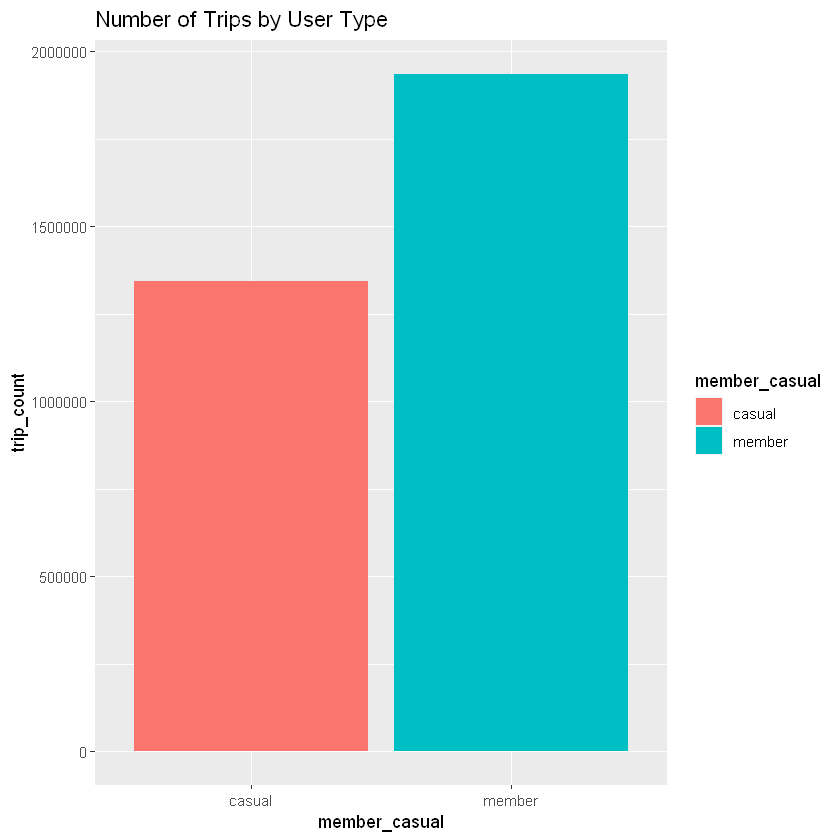

In [20]:
num_of_trips <- select(
  ride_data_clean, ride_id, member_casual) %>%
  group_by(member_casual) %>%
  summarise(trip_count = n()) %>%
  mutate(trip_perc = trip_count / sum(trip_count)) %>%
  ungroup()

num_of_trips

ggplot(num_of_trips, aes(
  x = member_casual,
  y = trip_count, fill = member_casual
)) +
  geom_bar(stat = "identity") +
  ggtitle("Number of Trips by User Type")

##### Trip Duration
Now lets see which group of users spend the most time riding.
* Members on average ride for 15.3 minutes with a median of 11.6.
* Casual users ride for an average of 34.8 minutes with a median of 21.5.
So there is a clear difference in trip duration between the user groups, with members taking shorter trips than casual users.

member_casual,mean_trip_time_minutes,median_trip_time_minutes
<chr>,<dbl>,<dbl>
casual,34.85772,21.55000
member,15.33231,11.58333


Warning message:
"Removed 13310 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 4 rows containing missing values (`geom_path()`)."


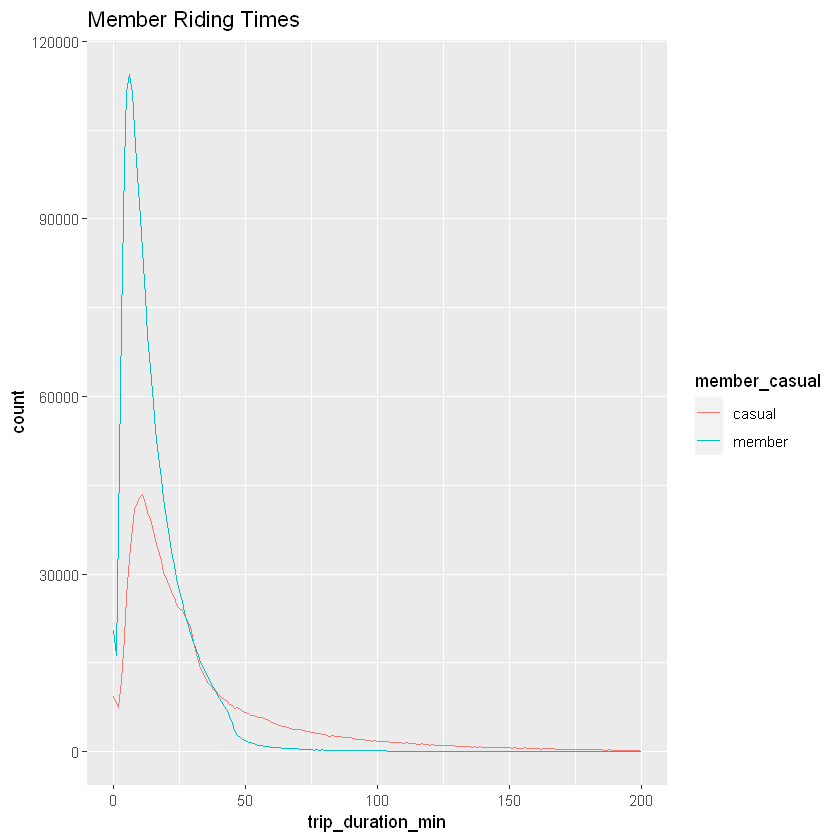

In [21]:
riding_time_by_usertype_min <- select(
  ride_data_clean, ride_id, member_casual, trip_duration_min)  %>%
  group_by(member_casual) %>%
  summarise(
    mean_trip_time_minutes = mean(trip_duration_min),
    median_trip_time_minutes = median(trip_duration_min)
  ) %>%
  ungroup()

riding_time_by_usertype_min

riding_time_min <- select(
  ride_data_clean, ride_id, member_casual, trip_duration_min)

ggplot(riding_time_min, aes(trip_duration_min, color = member_casual)) +
  geom_freqpoly(binwidth = 1) + xlim(0, 200) + 
  ggtitle("Member Riding Times")

### Trip Start Times
We can look at what times the two groups start trips. There is a difference between the two groups: member usage has peaks aligning with rush hour commuting hours and lunchtime. Casual users see a lower usage in the early morning, then a smooth increase throughout the day, declining after 1700.

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


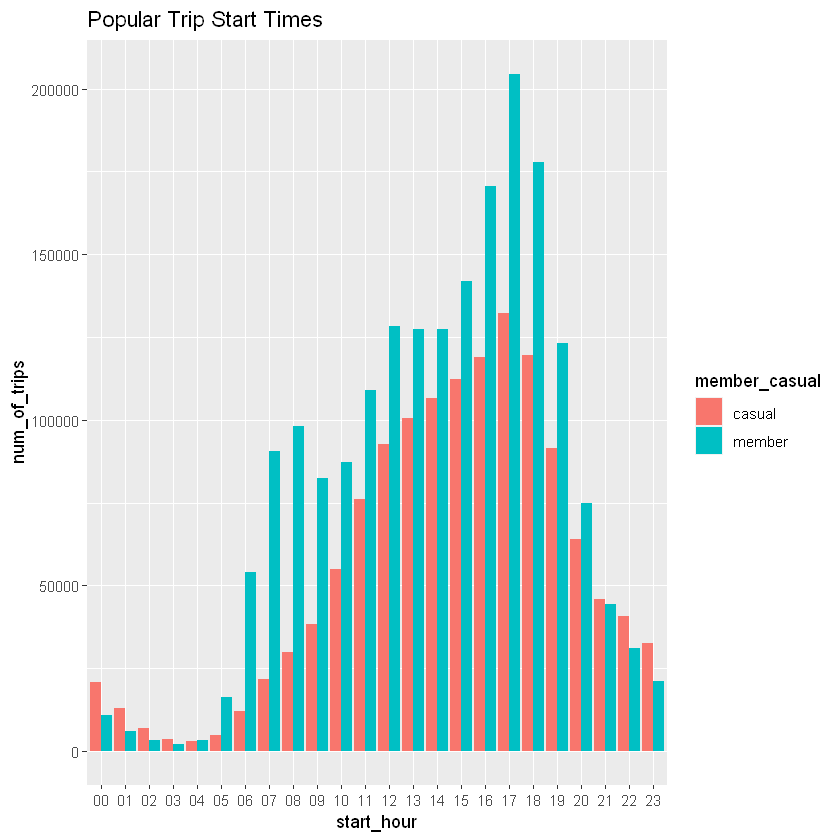

In [22]:
popular_start_times <- ride_data_clean %>%
  select(member_casual, started_at) %>%
  mutate(start_hour = format(as.POSIXct(started_at), format = "%H")) %>%
  group_by(member_casual, start_hour) %>%
  summarise(num_of_trips = n()) %>%
  ungroup()

ggplot(popular_start_times, aes(start_hour, num_of_trips, fill = member_casual)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  ggtitle("Popular Trip Start Times")

### Distribution of trips across the data period.
We can look at the number of trips across the 12 month data period to see if there is any difference between members and casual users. 

We can see that there is a seasonal pattern common to both members and casual users, but members are more consistent in their use of the service, whilst casual users shows considerable short-term variation, especially in the summer months, but also around other specific periods. This could suggest that casual users are more opportunistic, choosing to use the service when other factors align (e.g. perhaps weather, etc.), whilst members are more comitted to using the service day-to-day.

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


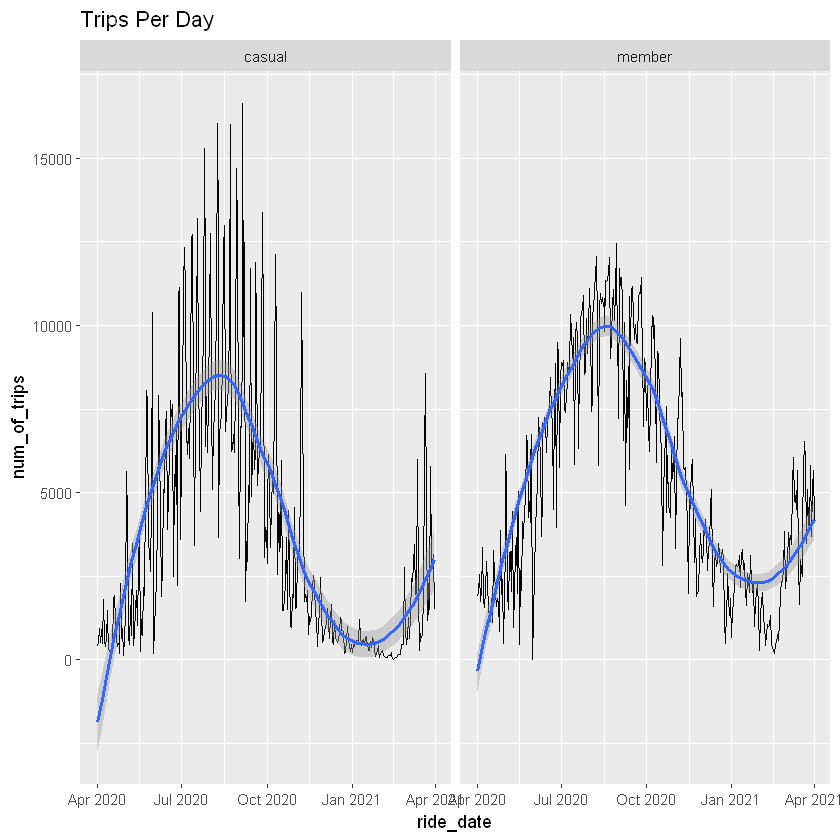

In [23]:
trips_per_day <- select(
  ride_data_clean, ride_id, started_at, member_casual) %>%
  mutate(ride_date = as.Date(started_at)) %>%
  group_by(member_casual, ride_date) %>%
  summarise(num_of_trips = n()) %>%
  ungroup()

ggplot(
  trips_per_day,
  aes(ride_date, num_of_trips)
  ) +
  facet_wrap(~ member_casual) +
  geom_line(stat = "identity") +
  geom_smooth() +
  ggtitle("Trips Per Day")

### Distance Between Start and End Stations
We can approximate the linear distance between start and end stations as difference of latitude and longitude using the Pythagorean theorem:

* We calculate the difference in latitude and square it.
* We calculate the difference in longitude and square it.
* We add the the two results and take the square root.
* Multiplying this by 111139 give us the approximate distance in metres and dividing by 1000 gives the distance in km.

Lets add this to the data as a column. _We need to remember that this is the distance between start and end stations, not the actual distance the users travelled._

In [24]:
ride_data_clean <- ride_data_clean %>%
  mutate(straight_line_distance_km = ((sqrt((start_lat - end_lat)^2 +
    (start_lng - end_lng)^2) * 111139) / 1000))

Now lets look at the differences in straight line distance between the two user types. We can see that the average distance travelled only differs by 130m.

member_casual,mean_trip_distance_km,median_trip_distance_km
<chr>,<dbl>,<dbl>
casual,2.407748,1.882123
member,2.534344,1.977223


Warning message:
"Removed 2806 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 4 rows containing missing values (`geom_path()`)."


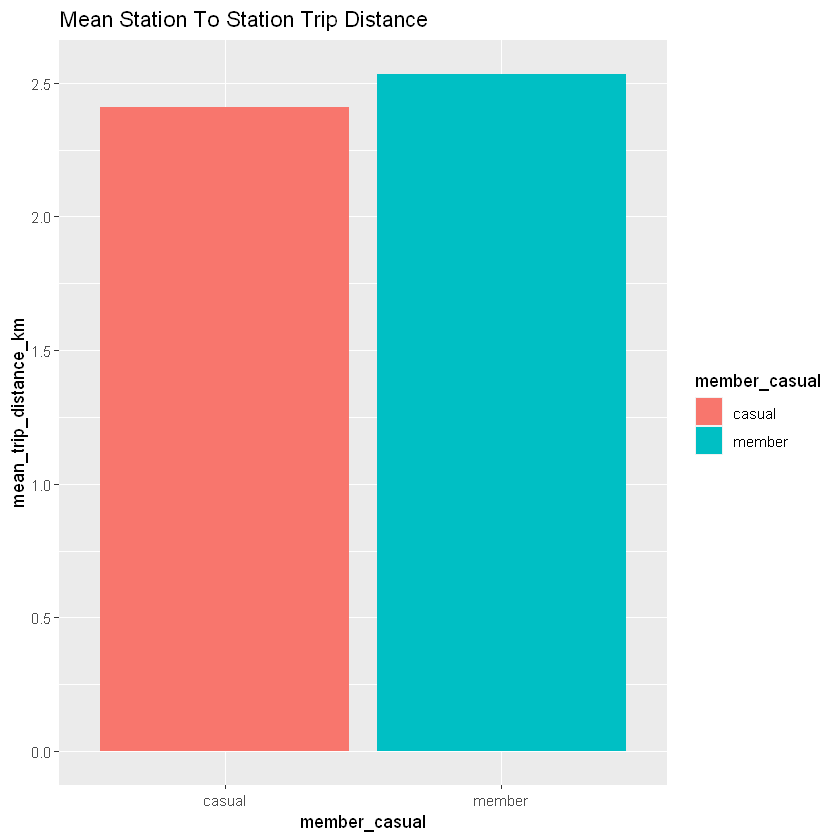

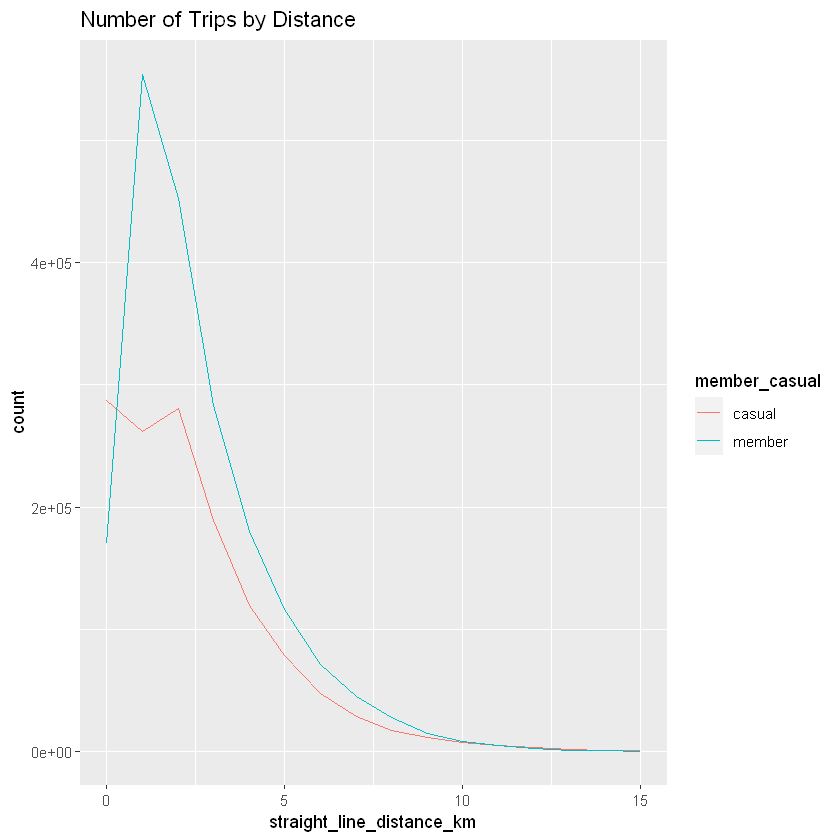

In [25]:
distance_by_usertype <- ride_data_clean %>%
  group_by(member_casual) %>%
  summarise(
    mean_trip_distance_km = mean(straight_line_distance_km),
    median_trip_distance_km = median(straight_line_distance_km)
  ) %>%
  ungroup()

distance_by_usertype

ggplot(
  distance_by_usertype,
  aes(x = member_casual, y = mean_trip_distance_km, fill = member_casual)
) +
  geom_bar(stat = "identity") +
  ggtitle("Mean Station To Station Trip Distance")

trips_by_distance <- select(
  ride_data_clean, ride_id, member_casual, straight_line_distance_km)

ggplot(trips_by_distance, aes(x = straight_line_distance_km, color = member_casual)) +
  geom_freqpoly(binwidth = 1) + xlim(0, 15) + 
  ggtitle("Number of Trips by Distance")

### Riding Speed
Lets also work out how fast each rider would have to be travelling in km/h to cover the distance between start and end stations in the riding time, if they were travelling point-to-point.

Lets add that as a variable.

In [26]:
ride_data_clean <- ride_data_clean %>%
  mutate(speed_kmh = (straight_line_distance_km /
    (as.numeric(trip_duration_min) / 60)))

The very best cyclists might be able to ride at a maximum of 40km/h in perfect conditions. So lets count how many observations exceed 40km/h.

In [27]:
nrow(filter(ride_data_clean, speed_kmh > 40))

[1] 1604

The number of anomalies is small, but lets remove them from the data.

In [28]:
ride_data_clean <- ride_data_clean %>%
  filter(!(speed_kmh > 40))

And we can compare the average speeds of the two user groups. We can see that members on average travel ~52% faster than casual users.

member_casual,mean_speed_kmh,median_speed_kmh
<chr>,<dbl>,<dbl>
casual,7.471261,7.934018
member,11.360207,11.792513


Warning message:
"Removed 550744 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 4 rows containing missing values (`geom_path()`)."


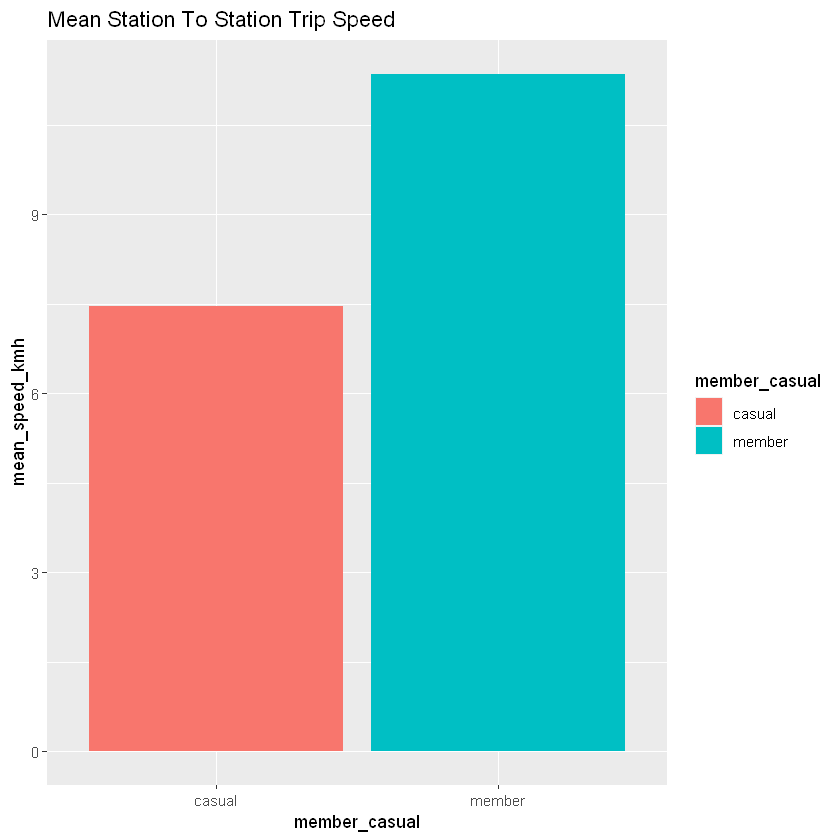

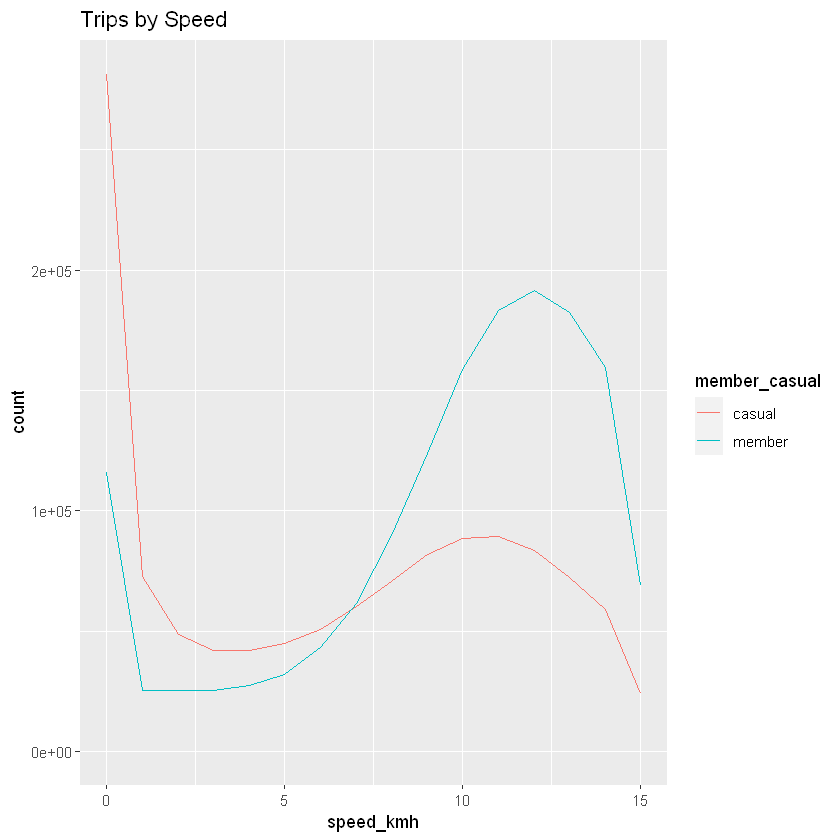

In [29]:
speed_kmh_by_usertype <- ride_data_clean %>%
  group_by(member_casual) %>%
  summarise(
      mean_speed_kmh = mean(speed_kmh),
      median_speed_kmh = median(speed_kmh)) %>%
  ungroup()

speed_kmh_by_usertype

ggplot(
  speed_kmh_by_usertype,
  aes(x = member_casual, y = mean_speed_kmh, fill = member_casual)
) +
  geom_bar(stat = "identity") +
  ggtitle("Mean Station To Station Trip Speed")

speed_trips_by_usertype <- select(
    ride_data_clean, ride_id, speed_kmh, member_casual
    ) 

ggplot(speed_trips_by_usertype, aes(x = speed_kmh, color = member_casual)) +
  geom_freqpoly(binwidth = 1) + xlim(0, 15) + 
  ggtitle("Trips by Speed")

### Geographical Clustering
We can look at the coordinates members and casual users start their journeys at. Ideally we would use ggmap to plot the coordinates on a map of Chicago so we could look at the neibourhoods each user group preferred, but this requires an API key which I do not want to include in this document. So for this study, we will just examine whether there is in fact a geographical preference difference between members and casual users - this could always form the basis of a future more detailed study.

We have far too many observations to plot all of them, so we will plot a sample.

We can see that based on a sample of 100,000 members and 100,000 casual users there is a clear difference between the two groups: casual use is much more localised and peaks in a small area; member use is more geographically spread out and the peak areas are separated into multiple zones of lower density, none of which seems to exactly coincide with the casual user peak zone.

Warning message:
"Removed 6480 rows containing non-finite values (`stat_density2d_filled()`)."


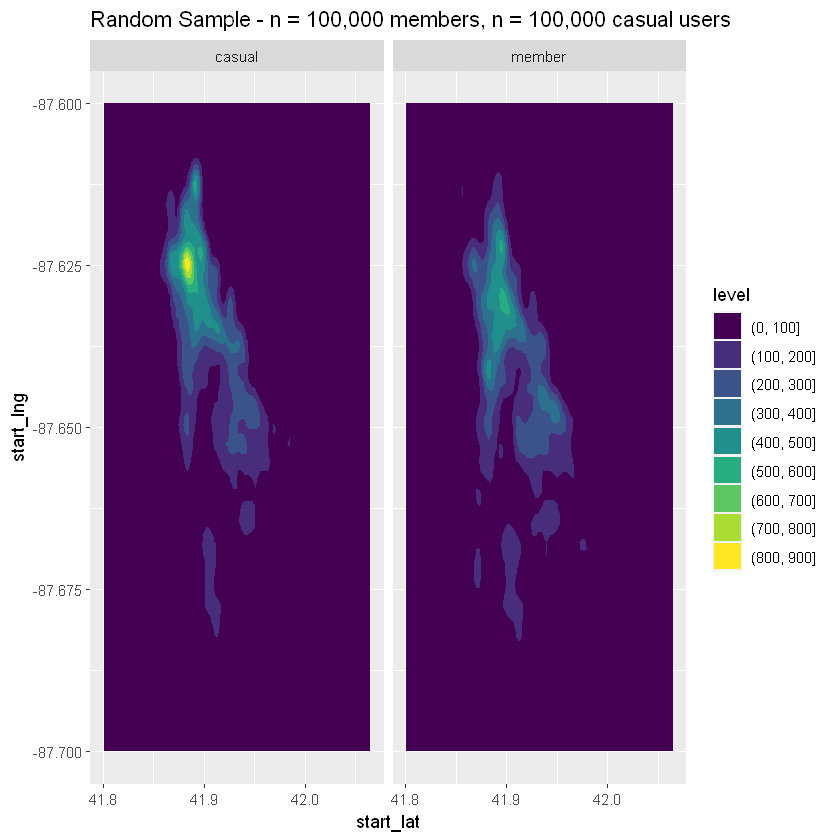

In [30]:
geographical_sample_members <- filter(
    ride_data_clean, member_casual == "member" &
    start_lat > 41.8 &
    start_lat < 42.1 &
    start_lng < 87.75 
) %>%
  select(
    ride_id, member_casual, start_lat, start_lng) %>%
    sample_n(100000)

geographical_sample_casual <- filter(
    ride_data_clean, member_casual == "casual"  &
    start_lat > 41.8 &
    start_lat < 42.1 &
    start_lng < 87.70
) %>%
  select(
    ride_id, member_casual, start_lat, start_lng) %>%
    sample_n(100000)

geographical_sample_all <-
  rbind(
      geographical_sample_members,
      geographical_sample_casual
)

ggplot(geographical_sample_all, aes(start_lat, start_lng)) +
  facet_wrap(~ member_casual) +
  geom_density_2d_filled() +
  ylim(-87.70, -87.60) +
  ggtitle("Random Sample - n = 100,000 members, n = 100,000 casual users")

### Bicycle Type
Finally lets look at differences in bicycle type usage between members and casual users. The problem is that we do not know in detail what the difference between all the values are: "classic_bike" sounds like a standard cycle, "electric_bike" seems clear, but "docked_bike" is ambiguous (it could be a version of an electric bike or just a standard cycle). We would need to seek more information to make real use of this data.

Looking at this data anyway, members use ~7.5% more classic bikes, ~0.8% more electric bikes and ~8.4% fewer docked bikes.

In [31]:
bicycle_type_trips <- ride_data_clean %>%
  group_by(member_casual, rideable_type) %>%
  summarise(trip_count = n()) %>%
  ungroup()

bicycle_type_trips_perc_member <-
  filter(bicycle_type_trips, member_casual == "member") %>%
  mutate(member_cycle_type_perc = trip_count / sum(trip_count))

bicycle_type_trips_perc_casual <-
  filter(bicycle_type_trips, member_casual == "casual") %>%
  mutate(casual_cycle_type_perc = trip_count / sum(trip_count))

bicycle_type_trips_perc_all <-
  cbind(
    select(
      bicycle_type_trips_perc_member, rideable_type, member_cycle_type_perc
    ),
    select(bicycle_type_trips_perc_casual, casual_cycle_type_perc)
  ) %>%
  mutate(member_diff_perc = member_cycle_type_perc - casual_cycle_type_perc)

bicycle_type_trips_perc_all

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.


rideable_type,member_cycle_type_perc,casual_cycle_type_perc,member_diff_perc
<chr>,<dbl>,<dbl>,<dbl>
classic_bike,0.1282971,0.05239689,0.075900239
docked_bike,0.7395887,0.82390127,-0.084312570
electric_bike,0.1321142,0.12370184,0.008412331


## Conclusions
We have used the following metrics to analyse the difference between members and casual users:

* Number of trips.
* Trip duration.
* Trip start times.
* Distribution of trips across the data period.
* Distance travelled between start and end station.
* Riding speed.
* Geographical clustering of start/end stations.
* The type of bike used.

The hypothesis was that members are more utility-oriented and casual users are more leisure-oriented. Does our data tell that story and support that hypothesis?

* Members take 18% more trips than casual users.
* Members on average take much shorter trips than casual users (~15 minutes versus ~34 minutes). 
* There are peaks in member trip start times which align with morning and evening commuting times and with lunchtime.
* The number of member trips per day is more consistent and shows less short-term variation.
* The average distance between start and end stations for the two user groups only differs by 130m.
* Members ride ~52% faster than casual users (using a metric based on riding time and distance between start and end stations).
* Members start location densities are geographically different from casual users and are spread over a wider area.
* There are differences in bycycle type usage, but more information is needed to interpret this.

These results could be interpreted as supporting the hypothesis in the following way: 

* Members are taking on average frequent, short, fast trips, with peak usage aligning with commuting and lunch times, and are using the service more consistently throughout the year (accounting for seasonal variation). This suggests that members are using the service primarily to get from point-to-point on a regular basis and are more reliant on it as a means of daily transport. 
* Their usage of the service is more geographically diffuse (in terms of start point) compared to casual users and peaks in different geographical areas: further analysis is needed to identify the character of these neibourhoods, but it could be suggested that more diverse usage again suggests day-to-day utility as compared to casual users whose usage peaks in a single area.


## Recommendations
The business task was to investigate the difference in usage between members and casual users with the aim of focusing marketing to increase membership subscriptions. The hypothesis that members are utility-oriented is consistent with several different findings of the analysis.

* The recommendation would be to conduct a test of marketing focusing on _utility_: the speed and ease of usage for members of the cycle hire scheme to quickly get from point A to point B in the city on a daily basis, especially connected with commuting and day-to-day tasks. Marketing could also be targeted at those points in the city where members currently most frequently use the service.

* It is also recommended to conduct a more detailed geographical analysis of the nature of the neibourhoods members tend to start and end their journeys at, as this may reveal more information on the reasons why members joined the scheme (i.e. are these areas commercial, business, or leisure zones?).